In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.datasets import load_breast_cancer

# Data

In [92]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
breast_labels.shape

(569,)

In [93]:
labels = np.reshape(breast_labels,(569,1))

#After reshaping the labels, you will concatenate the data and labels along the second axis, which means the final shape of the array will be 569 x 31.
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [94]:
breast_dataset = pd.DataFrame(final_breast_data)

In [95]:
features = breast.feature_names
features
#If you note in the features array, the label field is missing. 
#Hence, you will have to manually add it to the features array since you will be equating this array with the column names of your breast_dataset dataframe.

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [96]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [97]:
X_train, X_test, y_train, y_test = train_test_split(breast_dataset[features], breast_dataset.label, test_size = 0.2, random_state = 0)

#scaling
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA

## choose the optimal number of PC

In [98]:
pca = PCA(n_components = 10)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

principal_test_Df = pd.DataFrame(data = X_test)
principal_test_Df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.319562,2.016632,-2.279753,0.267478,-0.538920,-0.131470,0.319686,0.975543,0.475877,-0.032281
1,-2.744980,-1.690235,-0.237295,2.337835,-0.248390,-0.445026,-0.421110,0.126185,0.458915,-0.280831
2,-3.156518,-2.299344,-0.142745,-1.076863,1.307564,-0.236840,-0.304623,0.216281,-0.035046,-0.558291
3,-2.736696,-2.585982,-0.914412,0.297755,1.757097,0.858212,0.757888,-0.004656,0.012771,-0.611976
4,-3.725789,-1.447848,1.743435,0.675013,0.189714,0.177199,-0.906796,0.979376,-1.414912,1.289306


In [99]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.43430767, 0.19740115, 0.09351771, 0.06677661, 0.05642452,
       0.04071619, 0.02149254, 0.01512693, 0.01396763, 0.01160092])

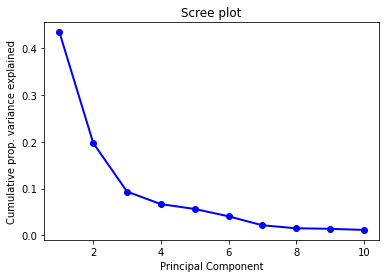

In [100]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, explained_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative prop. variance explained')
plt.show()

[0.43430767463213804, 0.6317088202503511, 0.7252265272163211, 0.7920031329727062, 0.8484276494299335, 0.8891438432147126, 0.9106363829667496, 0.9257633097849693, 0.9397309362154105, 0.9513318518060246]


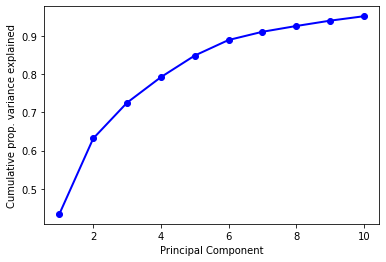

In [101]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, cum_explained_var, 'o-', linewidth=2, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative prop. variance explained')
plt.show()

## fit the data with best PCs

In [102]:
pca = PCA(n_components = 5)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train model like logistic regression

In [103]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

 
cm = confusion_matrix(y_test, y_pred)
cm

roc_auc_score(y_test, y_pred)

0.9531597332486503

# Visualization of test result

In [104]:
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('blue', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

ValueError: X has 2 features per sample; expecting 5

## 2

In [13]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [14]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

Let's convert the normalized features into a tabular format with the help of DataFrame.

In [15]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components.

You will use the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. 

In [17]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

Next, let's create a DataFrame that will have the principal component values for all 569 samples.

In [19]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [20]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

Let's plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis. It should give you good insight into how your samples are distributed among the two classes.

<Figure size 432x288 with 0 Axes>

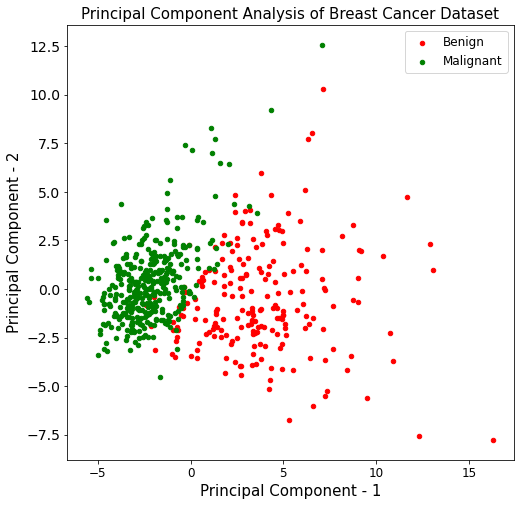

In [29]:
plt.figure()
plt.figure(figsize=(8,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=15)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 20)

plt.legend(targets,prop={'size': 12})